## Problem statement

Ola wants to predict if an employee will be leaving the company based on the attributes of the employee.

In [1]:
#importing the libraries required for analysis
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data into pandas dataframe
ola_data_original = pd.read_csv('ola_driver_scaler.csv')

In [3]:
#fetching the top 5 rows of the dataframe for an overview
ola_data_original.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
#To get an idea about the number of rows and columns in the data.
ola_data_original.shape

(19104, 14)

__There are 14 columns and 19104 rows in the dataset.__

In [5]:
ola_data_original.drop(ola_data_original.columns[0],axis=1,inplace=True)# dropping the Unnamed column which is unnecesary

In [6]:
ola_data_original.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [7]:
#To get a detailed summary of the numerical data
ola_data_original.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [8]:
# To see the datat types of all the columns.
ola_data_original.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

__We can see that the dates are of type object, we should convert them to datetime.__

In [9]:
#converting the date columns datatype to "datetime".
ola_data_original['MMM-YY'] = pd.to_datetime(ola_data_original['MMM-YY'])
ola_data_original['Dateofjoining'] = pd.to_datetime(ola_data_original['Dateofjoining'])
ola_data_original['LastWorkingDate'] = pd.to_datetime(ola_data_original['LastWorkingDate'])

In [10]:
# we can see that the data types of date columns are correct now.
ola_data_original.dtypes

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [11]:
#The info method gives us the information about the dataset, which can help us find out the types,missing values if any.
ola_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [12]:
# creating a dataframe that will have the number of missing values and percent of missing values of each feature.This will increase the readability.
ola_missingdata = pd.DataFrame(columns=['Feature','Numberofmissingvalues','Percent'])
ola_missingdata['Feature'] = ola_data_original.columns
ola_missingdata['Numberofmissingvalues'] = [ola_data_original[i].isna().sum() for i in ola_data_original.columns.values]
ola_missingdata['Percent'] = [(ola_data_original[i].isna().sum()/len(ola_data_original))*100 for i in ola_data_original.columns.values]

In [13]:
ola_missingdata

,Feature,Numberofmissingvalues,Percent
0,MMM-YY,0,0.000000
1,Driver_ID,0,0.000000
2,Age,61,0.319305
3,Gender,52,0.272194
4,City,0,0.000000
5,Education_Level,0,0.000000
6,Income,0,0.000000
7,Dateofjoining,0,0.000000
8,LastWorkingDate,17488,91.541039
9,Joining Designation,0,0.000000


__We see that the three columns Age,Gender have missing values. The percentage of the missing values is low, 0.31 for age and 0.27 for Gender. The Lastworking date missing values are not considered as missing values , they will be handled when we group the driver ids.__

In [14]:
ola_data_original[ola_data_original['Age'].isna()]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
72,2020-02-01,20,NaN,1.0,C19,0,40342,2019-10-25,NaT,3,3,0,1
97,2019-10-01,22,NaN,0.0,C10,2,31224,2018-05-25,NaT,1,1,200000,3
110,2019-07-01,24,NaN,0.0,C24,2,76308,2018-05-25,NaT,1,2,203240,3
212,2019-11-01,40,NaN,0.0,C15,0,59182,2019-11-08,NaT,2,2,0,1
261,2019-05-01,49,NaN,0.0,C20,0,53039,2018-05-25,NaT,1,2,124190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,2020-05-01,2690,NaN,0.0,C11,2,77662,2018-07-17,NaT,1,2,692600,4
18722,2020-08-01,2730,NaN,1.0,C16,2,69924,2019-07-08,NaT,2,2,161860,2
18780,2019-03-01,2738,NaN,0.0,C17,0,23068,2018-09-08,NaT,1,1,639780,3
18843,2019-01-01,2751,NaN,0.0,C17,2,53115,2015-11-05,NaT,1,1,506550,3


In [15]:
ola_data_original[ola_data_original['Driver_ID']==20]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
68,2019-10-01,20,26.0,1.0,C19,0,40342,2019-10-25,NaT,3,3,0,1
69,2019-11-01,20,26.0,1.0,C19,0,40342,2019-10-25,NaT,3,3,0,1
70,2019-12-01,20,26.0,1.0,C19,0,40342,2019-10-25,NaT,3,3,0,1
71,2020-01-01,20,26.0,1.0,C19,0,40342,2019-10-25,NaT,3,3,0,1
72,2020-02-01,20,NaN,1.0,C19,0,40342,2019-10-25,NaT,3,3,0,1
73,2020-03-01,20,26.0,1.0,C19,0,40342,2019-10-25,2020-03-01,3,3,0,1


In [16]:
# extracting all the numeric columns to prepare the data for knn imputation as we see missing values in the data.
ola_data_numeric = ola_data_original.select_dtypes(include=np.number)
ola_data_numeric = ola_data_numeric[['Driver_ID','Age','Gender','Education_Level','Income','Joining Designation','Grade']]

In [17]:
#importing knnimputer and transforming the data by imputing missing values using the knnimputer.
from sklearn.impute import KNNImputer
ola_data_transform = pd.DataFrame(KNNImputer(n_neighbors = 2).fit_transform(ola_data_numeric), columns = ola_data_numeric.columns)

In [18]:
ola_data_original['Age'] = ola_data_transform['Age']

In [19]:
ola_data_original['Gender']=ola_data_transform['Gender']

In [20]:
ola_data_original

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [21]:
#checking the missing values after knn imputation
ola_missingdata = pd.DataFrame(columns=['Feature','Numberofmissingvalues','Percent'])
ola_missingdata['Feature'] = ola_data_original.columns
ola_missingdata['Numberofmissingvalues'] = [ola_data_original[i].isna().sum() for i in ola_data_original.columns.values]
ola_missingdata['Percent'] = [(ola_data_original[i].isna().sum()/len(ola_data_original))*100 for i in ola_data_original.columns.values]

In [22]:
ola_missingdata

,Feature,Numberofmissingvalues,Percent
0,MMM-YY,0,0.000000
1,Driver_ID,0,0.000000
2,Age,0,0.000000
3,Gender,0,0.000000
4,City,0,0.000000
5,Education_Level,0,0.000000
6,Income,0,0.000000
7,Dateofjoining,0,0.000000
8,LastWorkingDate,17488,91.541039
9,Joining Designation,0,0.000000


__I have used the knn imputation technique to impute missing columns for the columns Age and Gender.__

In [23]:
ola_data_original.head(20)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
5,2019-12-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
6,2020-01-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
7,2020-02-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
8,2020-03-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,350000,1
9,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1


In [24]:
#grouping the driver_id as there are multiple rows for each driver_id
ola_data_final = ola_data_original.groupby('Driver_ID').agg({'MMM-YY':'last','Age':'last','Gender':'last','City':'last','Education_Level':'last','Income':'last','Dateofjoining':'last','LastWorkingDate':'last','Joining Designation':'last','Grade':'last','Total Business Value':'sum','Quarterly Rating':'last'})

In [25]:
ola_data_final.reset_index(inplace=True)

In [26]:
ola_data_final.shape

(2381, 13)

In [27]:
ola_data_final.isna().sum()

Driver_ID                 0
MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
dtype: int64

In [28]:
#Target is the variable that describes whether the employee left the company or not.If the last working date is null for the employee we will mark it as 0 else 1.
ola_data_final['target'] = ola_data_final.apply(lambda x: 1 if(x.LastWorkingDate is not pd.NaT) else 0,axis=1)

In [29]:
df=pd.DataFrame(ola_data_original.groupby('Driver_ID').aggregate(Incomemax = ('Income','max'),Incomemin=('Income','min')))
df['Diff'] = df['Incomemax']-df['Incomemin']

In [30]:
#adding a new column to the dataset that describes if the salary has been incremented for the employee
ola_data_final['increment_income'] = ola_data_final.apply(lambda x:1 if(df.loc[x.Driver_ID,'Diff']>0) else 0,axis=1)

In [31]:
ola_data_final['increment_income'].value_counts()

0    2337
1      44
Name: increment_income, dtype: int64

In [32]:
#adding a new column to the dataset that describes if the rating has been improved for the employee
df2=pd.DataFrame(ola_data_original.groupby('Driver_ID').aggregate(Qratemax = ('Quarterly Rating','max'),Qratemin=('Quarterly Rating','min')))
df2['Diff'] = df2['Qratemax']-df2['Qratemin']

In [33]:
ola_data_final['rating_improved'] = ola_data_final.apply(lambda x:1 if(df2.loc[x.Driver_ID,'Diff']>0) else 0,axis=1)

In [34]:
ola_data_final['rating_improved'].value_counts()

0    1277
1    1104
Name: rating_improved, dtype: int64

In [35]:
ola_data_final['Lastworkingyear'] = ola_data_final['LastWorkingDate'].dt.year

In [36]:
ola_data_final['JoiningMonth'] = ola_data_final['Dateofjoining'].dt.month
ola_data_final['JoiningYear'] = ola_data_final['Dateofjoining'].dt.year

In [37]:
ola_data_final['Lastworkingmonth'] = ola_data_final['LastWorkingDate'].dt.month

#### EDA on the derived dataset

In [38]:
ola_data_final.shape

(2381, 20)

__We have 16 columns and 2381 rows in the derived dataset.__

In [39]:
ola_data_final.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,increment_income,rating_improved,Lastworkingyear,JoiningMonth,JoiningYear,Lastworkingmonth
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,1616.000000,2381.000000,2381.000000,1616.000000
mean,1397.559009,33.665477,0.410122,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.678706,0.018480,0.463671,2019.483292,7.357413,2018.536329,6.358911
std,806.161628,5.981688,0.491852,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.467071,0.134706,0.498783,0.506031,3.143143,1.609597,3.477823
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,2013.000000,1.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,2019.000000,5.000000,2018.000000,3.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,1.000000,0.000000,0.000000,2019.000000,7.000000,2019.000000,6.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,1.000000,0.000000,1.000000,2020.000000,10.000000,2020.000000,9.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000,2020.000000,12.000000,2020.000000,12.000000


In [40]:
ola_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  Grade                 2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  target            

In [41]:
#checking for missing values
ola_data_final.isna().sum()

Driver_ID                 0
MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
target                    0
increment_income          0
rating_improved           0
Lastworkingyear         765
JoiningMonth              0
JoiningYear               0
Lastworkingmonth        765
dtype: int64

In [42]:
#checking for the number of unique values in each column
ola_data_final.nunique()

Driver_ID               2381
MMM-YY                    24
Age                       37
Gender                     3
City                      29
Education_Level            3
Income                  2339
Dateofjoining            869
LastWorkingDate          493
Joining Designation        5
Grade                      5
Total Business Value    1629
Quarterly Rating           4
target                     2
increment_income           2
rating_improved            2
Lastworkingyear            3
JoiningMonth              12
JoiningYear                8
Lastworkingmonth          12
dtype: int64

__We can see that there are 29 unique cities, 5 different grades, 4 quarterly ratings, 5 joining designations__

In [43]:
#data preprocessing
ola_data_final[(ola_data_final['Gender']!=1.0)&(ola_data_final['Gender']!=0.0)]

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,increment_income,rating_improved,Lastworkingyear,JoiningMonth,JoiningYear,Lastworkingmonth
676,793,2020-12-01,26.0,0.5,C7,2,92670,2020-10-30,NaT,3,3,127800,1,0,0,0,NaN,10,2020,NaN


__Due to imputation the Gender value has become 0.5 which does not make sense.__

In [44]:
ola_data_original[ola_data_original['Driver_ID']==793]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
5365,2020-11-01,793,26.0,1.0,C7,2,92670,2020-10-30,NaT,3,3,0,1
5366,2020-12-01,793,26.0,0.5,C7,2,92670,2020-10-30,NaT,3,3,127800,1


In [45]:
ola_data_final[ola_data_final['Driver_ID']==793]

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,increment_income,rating_improved,Lastworkingyear,JoiningMonth,JoiningYear,Lastworkingmonth
676,793,2020-12-01,26.0,0.5,C7,2,92670,2020-10-30,NaT,3,3,127800,1,0,0,0,NaN,10,2020,NaN


In [46]:
ola_data_final.loc[676,'Gender'] = 1.0

In [47]:
ola_data_final.nunique()

Driver_ID               2381
MMM-YY                    24
Age                       37
Gender                     2
City                      29
Education_Level            3
Income                  2339
Dateofjoining            869
LastWorkingDate          493
Joining Designation        5
Grade                      5
Total Business Value    1629
Quarterly Rating           4
target                     2
increment_income           2
rating_improved            2
Lastworkingyear            3
JoiningMonth              12
JoiningYear                8
Lastworkingmonth          12
dtype: int64

In [48]:
ola_data_final.groupby('target')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,765.0,67662.90719,29578.579157,12938.0,46131.0,64154.0,84573.00,188418.0
1,1616.0,55391.40099,26924.959518,10747.0,36117.5,51630.0,69816.75,167758.0


__The average income for the drivers who have churned is 26924 and not churned is 29578.__

In [49]:
 ola_data_final.groupby('target')['Total Business Value'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,765.0,9.620626e+06,1.323157e+07,0.0,240920.0,2636210.0,16290800.0,95331060.0
1,1616.0,2.203746e+06,4.717754e+06,-1385530.0,0.0,465025.0,2345702.5,60153830.0


__The average total business value is more for people who did not churn and less for people who churned.__

In [50]:
ola_data_final['target'].value_counts()

1    1616
0     765
Name: target, dtype: int64

__There are 1616 drivers who churned and 765 who did not.__

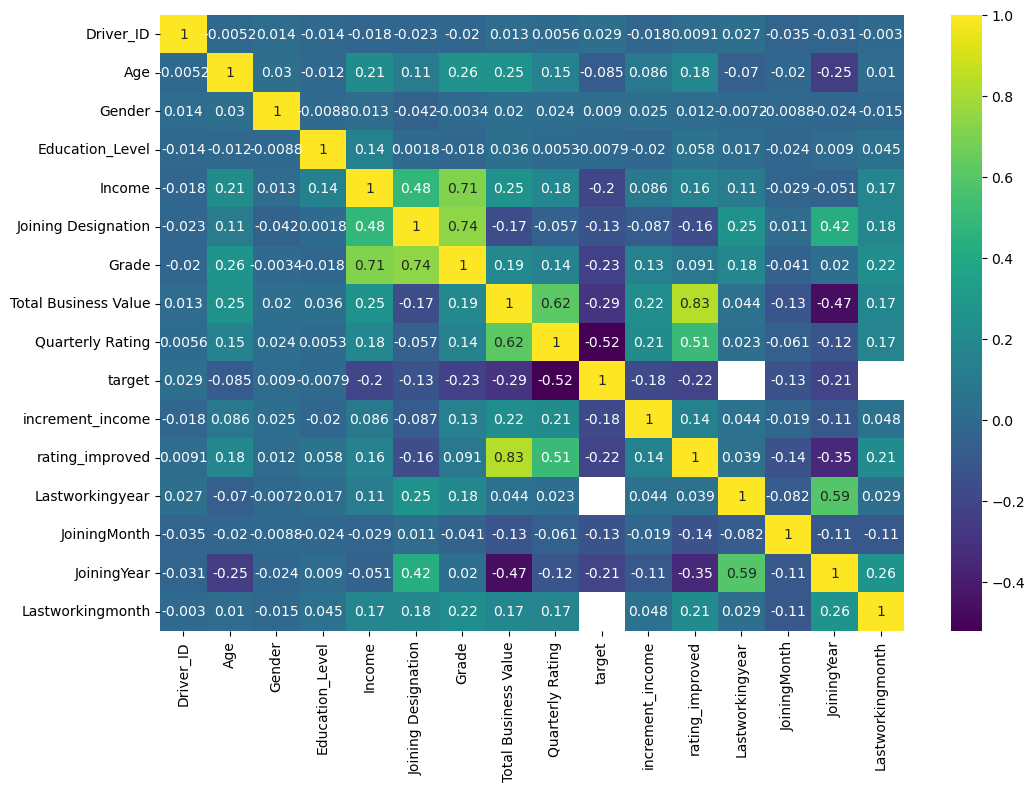

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(ola_data_final.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

__There is a high correlation between rating_improved(derived column) and the total business value (total business value occured by driver till the date).The joining date has a high correlation with grade and Income also has a high correlation with grade.Also, we can see that the quarterly rating is highly correlated with the target variable. If it is high, the driver may not churn.This is important for the model__

__Univariate plots__

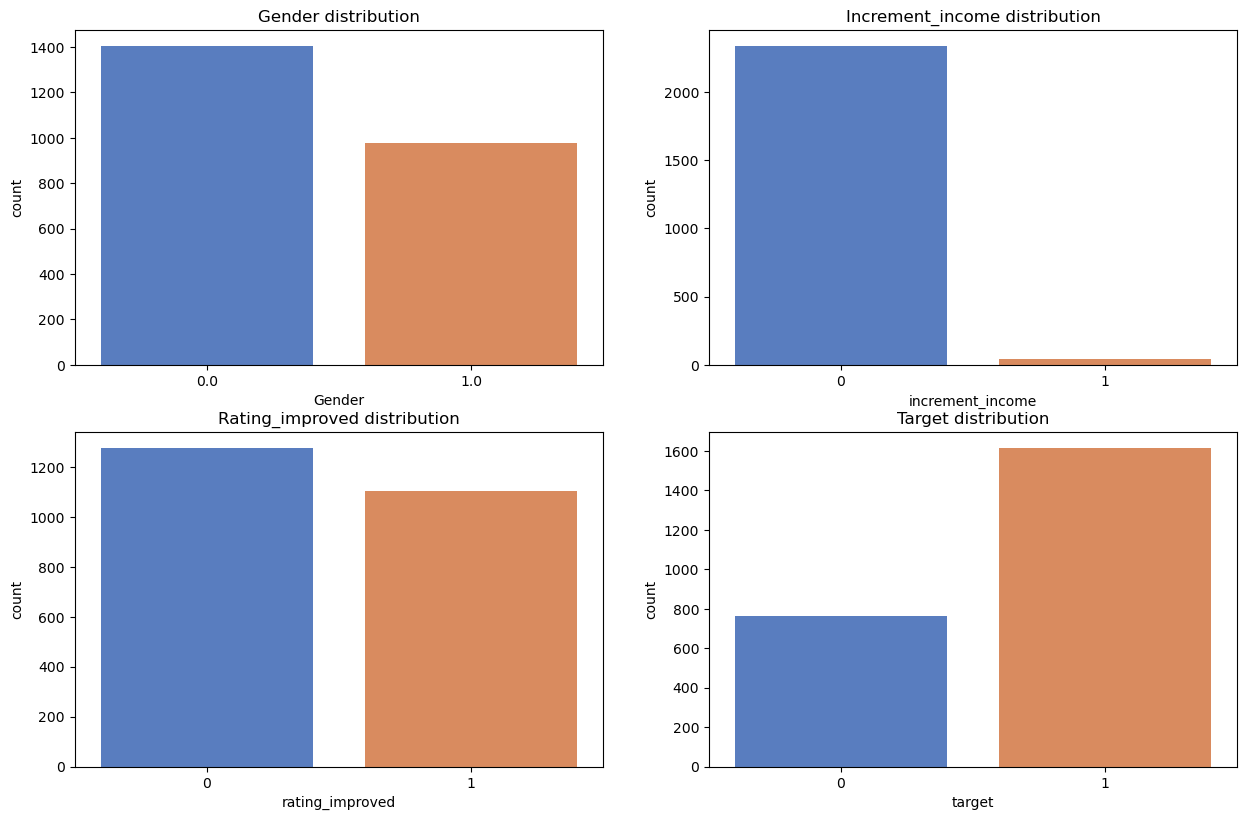

In [52]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='Gender', data=ola_data_final,palette='muted')
plt.title('Gender distribution')

plt.subplot(4, 2, 2)
sns.countplot(x='increment_income', data=ola_data_final, palette='muted')
plt.title('Increment_income distribution')

plt.subplot(4, 2, 3)
sns.countplot(x='rating_improved', data=ola_data_final, palette='muted')
plt.title('Rating_improved distribution')

plt.subplot(4, 2, 4)
sns.countplot(x='target', data=ola_data_final,palette='muted')
plt.title('Target distribution')
plt.show()

1. There are more male drivers(around 1400).
2. Only for few drivers the income has increased.
3. The quarterly rating has increased for around 1100 drivers and has remained constant for around 1250 drivers.
4. There are more drivers who churned.

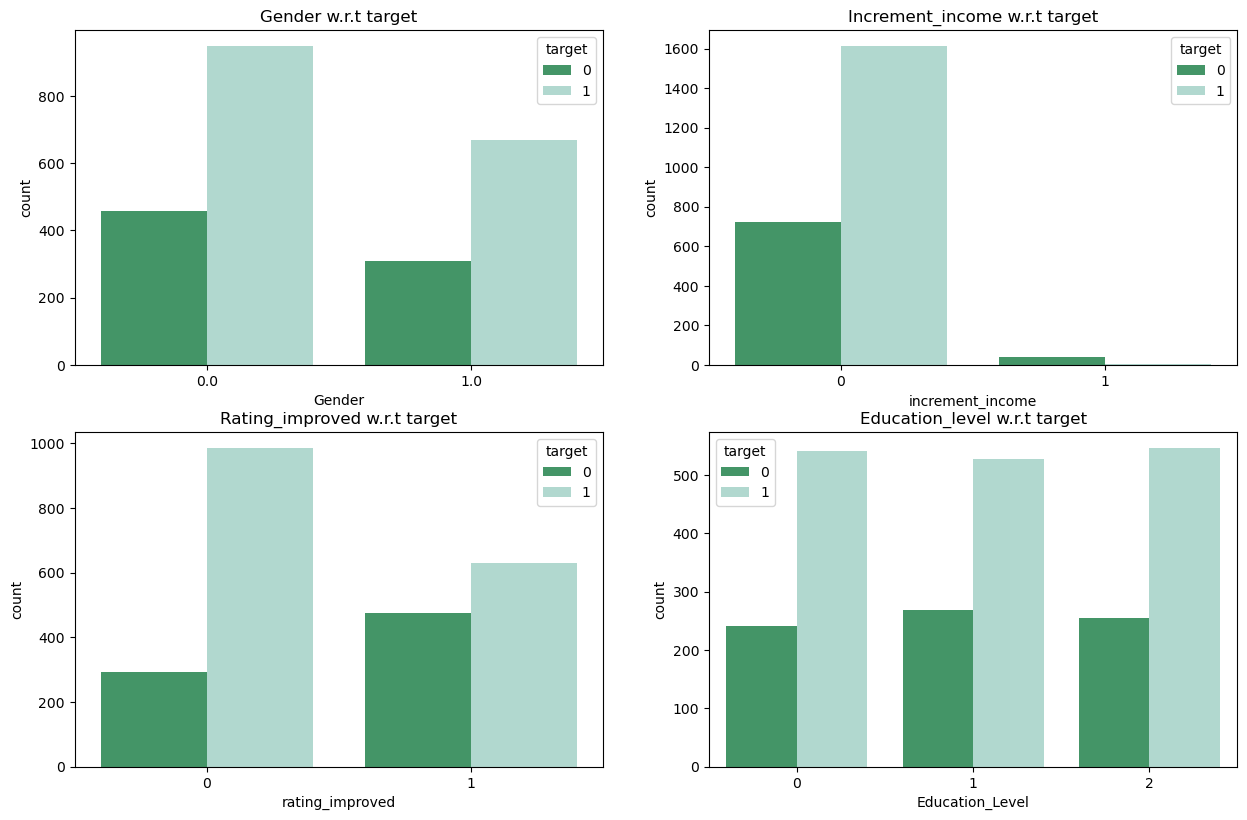

In [53]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='Gender', data=ola_data_final,hue='target',palette='BuGn_r')
plt.title('Gender w.r.t target')

plt.subplot(4, 2, 2)
sns.countplot(x='increment_income', data=ola_data_final, hue='target',palette='BuGn_r')
plt.title('Increment_income w.r.t target')

plt.subplot(4, 2, 3)
sns.countplot(x='rating_improved', data=ola_data_final,hue='target', palette='BuGn_r')
plt.title('Rating_improved w.r.t target')

plt.subplot(4, 2, 4)
sns.countplot(x='Education_Level', data=ola_data_final,hue='target',palette='BuGn_r')
plt.title('Education_level w.r.t target')
plt.show()

1. Male drivers have churned more than the female drivers.
2. All of the drivers who have churned belong to the category of income not increased from the date of joining.The drivers for whom the income has increased did not churn.
3. The drivers whose rating has not increased have churned more than the drivers whose rating has been increased.
4. The number of drivers who churned is equally distributed among the education_level. This means that the target and education_level are less related.We can remove the education_level column as it is not giving any useful insight.

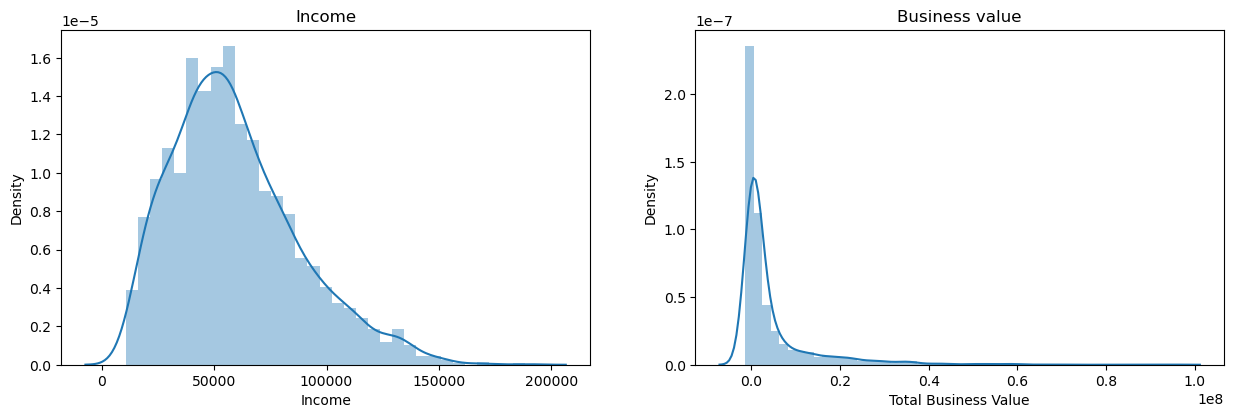

In [54]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.distplot(ola_data_final['Income'],kde=True)
plt.title('Income')

plt.subplot(4, 2, 2)
sns.distplot(ola_data_final['Total Business Value'],kde=True)
plt.title('Business value')
plt.show()

In [55]:
ola_data_final['JoiningMonth'].value_counts()

7     296
5     276
10    269
11    253
6     230
8     224
9     222
12    210
1     164
4     104
2      76
3      57
Name: JoiningMonth, dtype: int64

In [56]:
ola_data_final['JoiningYear'].value_counts()

2020    818
2018    599
2019    591
2015    109
2016    108
2017     86
2013     41
2014     29
Name: JoiningYear, dtype: int64

Many drivers have joined in the month of July. There were many drivers who joined in the year 2020.

In [57]:
ola_data_final['Lastworkingyear'].value_counts()

2019.0    825
2020.0    786
2018.0      5
Name: Lastworkingyear, dtype: int64

__There are many drivers who have churned in the year 2019.__

<AxesSubplot:xlabel='Joining Designation', ylabel='count'>

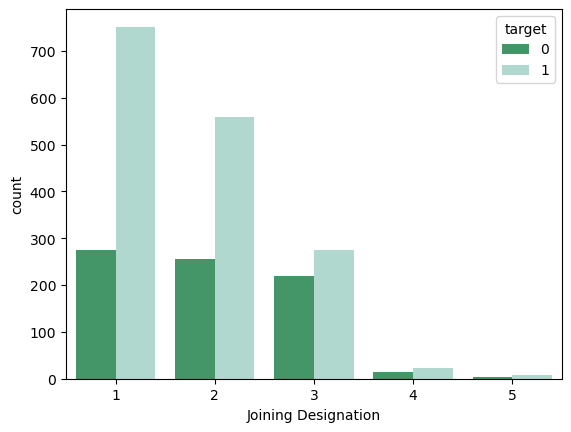

In [58]:
sns.countplot(x='Joining Designation', data=ola_data_final,hue='target',palette='BuGn_r')

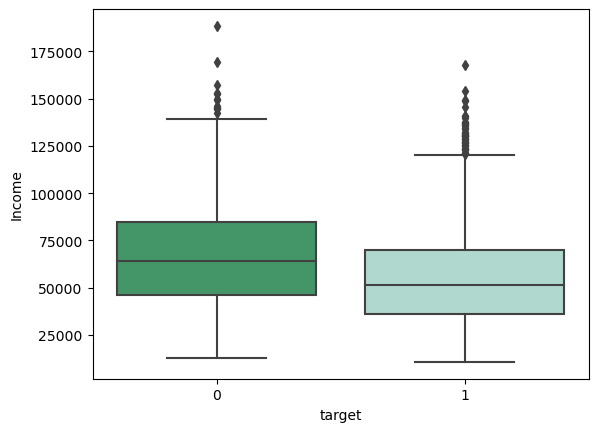

In [59]:
sns.boxplot(x='target',y='Income',data=ola_data_final,palette='BuGn_r')
plt.show()

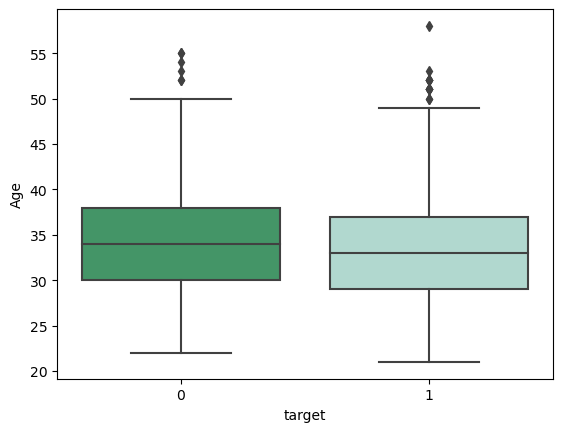

In [60]:
sns.boxplot(x='target',y='Age',data=ola_data_final,palette='BuGn_r')
plt.show()

__There is slight difference in the age between the drivers who churned and who did not. For the drivers who churned the median age is slightly higher.__

In [61]:
## one hot encoding
ola_data_final = pd.get_dummies(ola_data_final, columns=['City'], drop_first=True)

In [62]:
ola_data_final.head()

,Driver_ID,MMM-YY,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,2019-03-01,28.0,0.0,2,57387,2018-12-24,2019-03-11,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2020-12-01,31.0,0.0,2,67016,2020-11-06,NaT,2,2,...,0,0,0,0,0,0,0,1,0,0
2,4,2020-04-01,43.0,0.0,2,65603,2019-12-07,2020-04-27,2,2,...,0,0,0,0,0,0,0,0,0,0
3,5,2019-03-01,29.0,0.0,0,46368,2019-01-09,2019-03-07,1,1,...,0,0,0,0,0,0,0,0,0,1
4,6,2020-12-01,31.0,1.0,1,78728,2020-07-31,NaT,3,3,...,0,0,0,0,0,0,0,0,0,0


In [63]:
ola_data_final.drop(columns=['LastWorkingDate','MMM-YY','Dateofjoining','Lastworkingyear','Lastworkingmonth'],axis=1,inplace=True)

In [64]:
ola_data_final['Gender'] = ola_data_final['Gender'].astype('int')

In [65]:
ola_data_final['Gender'].value_counts()

0    1404
1     977
Name: Gender, dtype: int64

In [66]:
ola_data_final['increment_income'] = ola_data_final['increment_income'].astype('int')
ola_data_final['rating_improved'] = ola_data_final['rating_improved'].astype('int')

In [67]:
ola_data_final.dtypes

Driver_ID                 int64
Age                     float64
Gender                    int32
Education_Level           int64
Income                    int64
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
target                    int64
increment_income          int32
rating_improved           int32
JoiningMonth              int64
JoiningYear               int64
City_C10                  uint8
City_C11                  uint8
City_C12                  uint8
City_C13                  uint8
City_C14                  uint8
City_C15                  uint8
City_C16                  uint8
City_C17                  uint8
City_C18                  uint8
City_C19                  uint8
City_C2                   uint8
City_C20                  uint8
City_C21                  uint8
City_C22                  uint8
City_C23                  uint8
City_C24                  uint8
City_C25                  uint8
City_C26

In [68]:
##Splitting the data into train and test
X= ola_data_final.drop(['target','Driver_ID'],axis=1)
y=ola_data_final['target']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    stratify=y, random_state=42)

__Building ensemble bagging model without any hyperparameter tuning or oversampling__

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3,random_state=23)
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=dtree,n_estimators=7,bootstrap=True)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=23),
                  n_estimators=7)

In [71]:
print(f"Train score: {bagging.score(X_train,y_train)}")
print(f"Test Score: {bagging.score(X_test,y_test)}")

Train score: 0.8895558223289316
Test Score: 0.8895104895104895


__Hyperparametertuning for bagging classifier__

In [72]:
dtree_base = DecisionTreeClassifier()

In [73]:
bagging1 = BaggingClassifier(base_estimator=dtree_base,bootstrap=True)

In [74]:
param_grid= {"base_estimator__max_depth" : [1,2,3,4,5],
            "n_estimators" : [10,30,40,50],
            "max_samples" : [0.05,0.1,0.2,0.5],
            "max_features" : [0.2,0.3,0.5]}

In [75]:
#performing the hyperparameter tuning using gridsearchcv
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
folds= 3
grid_search_tree = GridSearchCV(bagging1, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [76]:
grid_search_tree.fit(X_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0.2, 0.3, 0.5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [10, 30, 40, 50]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [77]:
print(grid_search_tree.best_params_)

{'base_estimator__max_depth': 5, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 30}


In [78]:
#using the best params
dtree_base1 = DecisionTreeClassifier(max_depth=4)
bagging2 = BaggingClassifier(base_estimator=dtree_base1,bootstrap=True,max_features=0.5,max_samples=0.5,n_estimators=40)

In [79]:
bagging2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  max_features=0.5, max_samples=0.5, n_estimators=40)

In [80]:
y_pred = bagging2.predict(X_test)

In [81]:
print(bagging2.score(X_test,y_test))

0.848951048951049


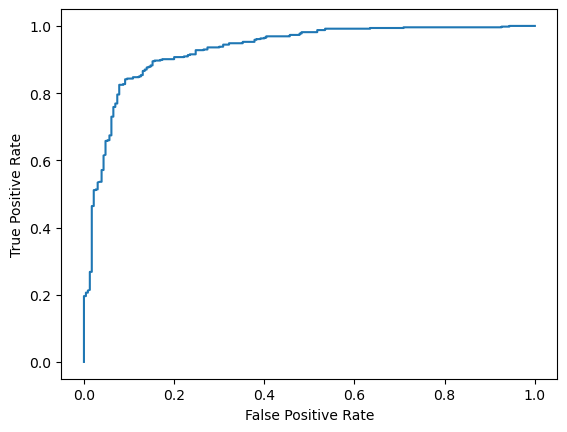

In [82]:
from sklearn import metrics
y_pred_prob = bagging2.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)
auc

0.9297131331241597

__The roc_auc curve looks good as it is almost touching the left corner which means that the tpr is high and fpr is relatively low for a thershold. And the area is 0.94 which is a good score.__

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       230
           1       0.84      0.96      0.90       485

    accuracy                           0.85       715
   macro avg       0.86      0.79      0.81       715
weighted avg       0.85      0.85      0.84       715



__The f1 score 0.90 is pretty good.This says the precision and recall are well balanced.__

### Boosting

In [85]:
## Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {"max_depth" : [1,2,3,4,5],
              "n_estimators": [30,50,70,100,200],
              "learning_rate":[0.1,0.3,0.5,0.7,1.0]
             }
gb = GradientBoostingClassifier()
folds= 3
grid_search_tree_boost1 = GridSearchCV(gb, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)



In [86]:
grid_search_tree_boost1.fit(X_train,y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [30, 50, 70, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [87]:
print(grid_search_tree_boost1.best_params_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


In [88]:
gb_best = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,n_estimators=100)

In [89]:
gb_best.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=2)

In [90]:
y_pred_gb= gb_best.predict(X_test)

In [91]:
print(gb_best.score(X_train,y_train))

0.9141656662665066


In [92]:
print(gb_best.score(X_test,y_test))

0.9272727272727272


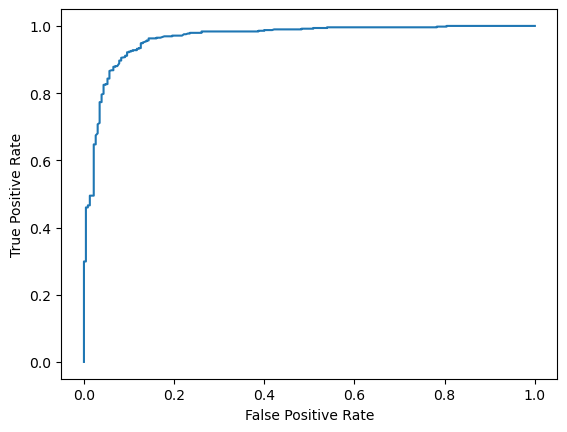

In [93]:
from sklearn import metrics
y_pred_prob_gb = gb_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_gb)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
auc = metrics.roc_auc_score(y_test, y_pred_prob_gb)
auc

0.9642626624831915

In [95]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       230
           1       0.93      0.96      0.95       485

    accuracy                           0.93       715
   macro avg       0.92      0.91      0.92       715
weighted avg       0.93      0.93      0.93       715



__We can see that the metrics improved when compared to bagging. In boosting, the auc score came out to be 0.96 and f1 score 0.93.__

In [96]:
##ADABOOST
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__max_depth" : [1,2,3,4,5],
              "n_estimators": [30,50,70,100,200],
              "learning_rate":[0.1,0.3,0.5,0.7,1.0]
             }
tree2 = DecisionTreeClassifier()
ABC = AdaBoostClassifier(base_estimator=tree2,algorithm="SAMME")
folds= 3
grid_search_tree_boost2 = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)



In [97]:
grid_search_tree_boost2.fit(X_train,y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'n_estimators': [30, 50, 70, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [98]:
print(grid_search_tree_boost2.best_params_)

{'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50}


In [99]:
tree2 = DecisionTreeClassifier(max_depth=3)
ABC_best = AdaBoostClassifier(base_estimator=tree2,algorithm='SAMME',learning_rate=0.1,n_estimators=50)
ABC_best.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1)

In [100]:
print(ABC_best.score(X_test,y_test))

0.9174825174825175


In [101]:
print(ABC_best.score(X_train,y_train))

0.9129651860744298


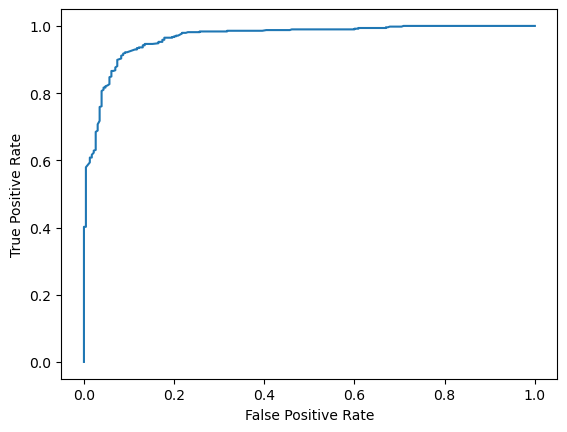

In [102]:
from sklearn import metrics
y_pred_prob_abc = ABC_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_abc)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [103]:
auc = metrics.roc_auc_score(y_test, y_pred_prob_abc)
auc

0.9659255939040788

In [104]:
y_pred_abc=ABC_best.predict(X_test)

In [105]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       230
           1       0.93      0.95      0.94       485

    accuracy                           0.92       715
   macro avg       0.91      0.90      0.90       715
weighted avg       0.92      0.92      0.92       715



### Oversampling and building the model

In [106]:
##Standardizing the data before oversampling
X_train_stdt = (X_train-X_train.mean())/X_train.std()

In [107]:
X_test_stdt = (X_test-X_train.mean())/X_train.std()

In [109]:
#using the smote technique to balance the data between two classes.This will improve the model.
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_stdt, y_train.ravel())

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 512.0 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [110]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2262, 40)
After OverSampling, the shape of train_y: (2262,) 

After OverSampling, counts of label '1': 1131
After OverSampling, counts of label '0': 1131


### Bagging after oversampling

In [111]:
dtree_base_os = DecisionTreeClassifier()
bagging_os = BaggingClassifier(base_estimator=dtree_base_os,bootstrap=True)
param_grid= {"base_estimator__max_depth" : [1,2,3,4,5],
            "n_estimators" : [10,30,40,50],
            "max_samples" : [0.05,0.1,0.2,0.5],
            "max_features" : [0.2,0.3,0.5]}
folds= 3
grid_search_tree_os = GridSearchCV(bagging_os, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [112]:
grid_search_tree_os.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0.2, 0.3, 0.5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [10, 30, 40, 50]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [113]:
print(grid_search_tree_os.best_params_)

{'base_estimator__max_depth': 4, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 40}


In [114]:
dtree_base_os = DecisionTreeClassifier(max_depth=5)
bagging_os = BaggingClassifier(base_estimator=dtree_base_os,max_features=0.5,max_samples=0.5,n_estimators=50)

In [115]:
bagging_os.fit(X_train_res,y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_features=0.5, max_samples=0.5, n_estimators=50)

In [116]:
y_pred_os = bagging_os.predict(X_test_stdt)

In [117]:
print(bagging_os.score(X_test_stdt,y_test))

0.9006993006993007


In [118]:
print(bagging_os.score(X_train_res,y_train_res))

0.9279398762157383


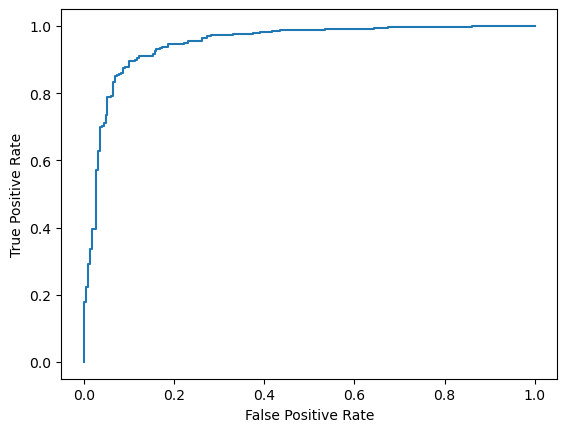

In [119]:
from sklearn import metrics
y_pred_prob_os = bagging_os.predict_proba(X_test_stdt)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_os)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
auc = metrics.roc_auc_score(y_test, y_pred_prob_os)
auc

0.9475123263110712

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_os))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       230
           1       0.92      0.94      0.93       485

    accuracy                           0.90       715
   macro avg       0.89      0.88      0.88       715
weighted avg       0.90      0.90      0.90       715



The auc-oc score has slightly increased when compared to the model before oversampling.

### Boosting after oversampling

In [122]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 7.7 MB/s eta 0:00:00


In [123]:
from xgboost import XGBClassifier
folds = 3

param_grid = {'learning_rate': [0.2,0.5, 0.6], 
             'subsample': [0.3,0.5, 0.6, 0.9],
             'n_estimators':[50,100,150,200,250,300]}          


xgb_model = XGBClassifier(max_depth=2)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [124]:
model_cv.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                      

In [125]:
print(model_cv.best_params_)

{'learning_rate': 0.2, 'n_estimators': 100, 'subsample': 0.3}


In [126]:
#3 building xgboost with the best hyperparameters
model_xgb = XGBClassifier(learning_rate=0.2,n_estimators=100,subsample=0.3,max_depth=2)
model_xgb.fit(X_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [127]:
y_pred_xgb = model_xgb.predict(X_test_stdt)

In [128]:
print(model_xgb.score(X_train_res,y_train_res))

0.9336870026525199


In [129]:
print(model_xgb.score(X_test_stdt,y_test))

0.9188811188811189


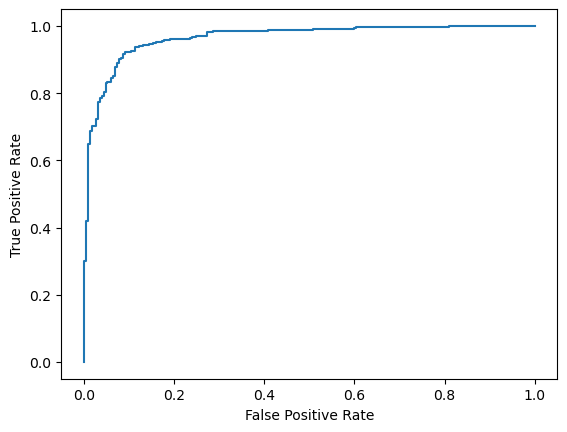

In [130]:
y_pred_prob_xgb = model_xgb.predict_proba(X_test_stdt)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_xgb)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [131]:
auc = metrics.roc_auc_score(y_test, y_pred_prob_xgb)
auc

0.9650291349170775

__The auc is 0.965 which is quiet a good score.__

In [132]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       230
           1       0.94      0.94      0.94       485

    accuracy                           0.92       715
   macro avg       0.91      0.91      0.91       715
weighted avg       0.92      0.92      0.92       715



#### Comments on model

The boosting algorithm has performed comparitively well than the bagging algorithm. The auc score is 0.965 for the boosting algorithm and F1 score is around 0.92. We can use the Gradient boosting algorithm as accuracy, f1 and auc are comparitively good.

### Insights and recommendations

1. The quarterly rating is highly correlated to the target variable(-0.52). This means, less rating high chance that the driver might churn.
2. Male drivers have churned more than female drivers.
3. The median income for the drivers who churned is 55k and the median income for the drivers who have not churned is slightly higher (67k).
4. The drivers whose monthly income or rating has not been increased have churned more than the drivers whose income or rating has been increased.
5. As the joining designation  increased from 1 to 5 , the ratio between churn and not churn has decreased.
6. In 2019, there were more drivers who left the company when comapred to the other years.

Recommendations:

1. Ola can start working more on appreciating the employee's hard work and recognising the good work .This can be done by introducing some awards or rewards to the employee who has been working hard/who has dropped the customer on time.
2. Ola should give timely promotions and increment rewards.
3. Ola can offer some additional benefits to the employees.